# Importing the libraries

In [102]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the iris dataset

In [103]:
# Load the iris dataset
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [105]:
# getting some more information on our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [104]:
# Drop the column
df = df.drop(['Id'], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
df.shape

(150, 5)

In [106]:
# obtaining a statistical description of the dataset
df.describe().all

<bound method DataFrame.all of        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000>

# Divided the data X, Y

In [85]:
# Finding the optimum number of clusters for k-means classification
X = df.iloc[:, [0, 1, 2, 3]].values
y = df['Species'].values

#  Label encode

In [107]:
# label encode data
le = LabelEncoder()
y = le.fit_transform(y)

# Visualization first two columns

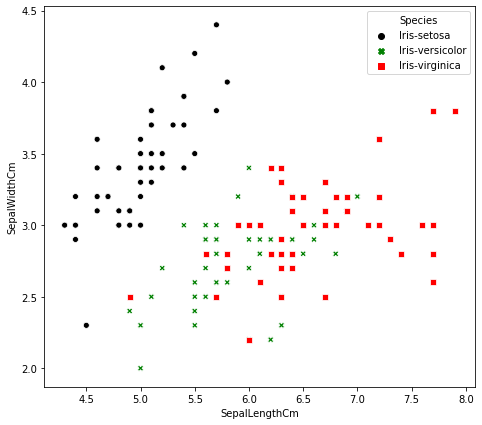

In [111]:
# Scatter Plot
fig, ax = plt.subplots(figsize=(17,7))
plt.subplot(1,2,1)
sns.scatterplot(x = df.SepalLengthCm, y =  df.SepalWidthCm,
                hue = df.Species, style = df.Species, palette=['black', 'green', 'red']);

# Visualization second last  two columns

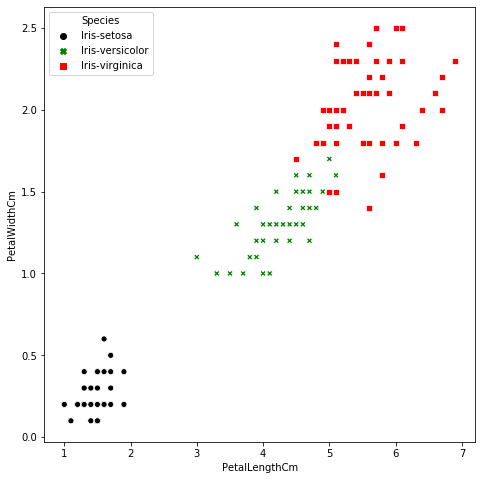

In [109]:
# scatter plot
fig, ax = plt.subplots(figsize=(17,8))
plt.subplot(1,2,2)
sns.scatterplot(x = df.PetalLengthCm, y =  df.PetalWidthCm,
                hue = df.Species, style = df.Species, palette=['black', 'green', 'red']);

# Visualization

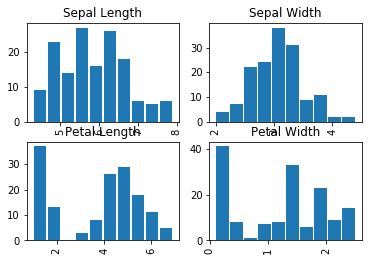

In [89]:
# Plot All columns using histogram
plt.subplot(2,2,1)
plt.hist(df['SepalLengthCm'], rwidth=0.9)
plt.xticks(rotation=90)
plt.title('Sepal Length')

plt.subplot(2,2,2)
plt.hist(df['SepalWidthCm'], rwidth=0.9)
plt.xticks(rotation=90)
plt.title('Sepal Width')

plt.subplot(2,2,3)
plt.hist(df['PetalLengthCm'], rwidth=0.9)
plt.xticks(rotation=90)
plt.title('Petal Length')

plt.subplot(2,2,4)
plt.hist(df['PetalWidthCm'], rwidth=0.9)
plt.xticks(rotation=90)
plt.title('Petal Width')

plt.show()

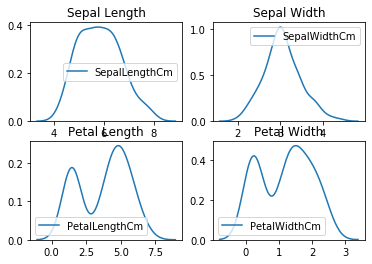

In [90]:
plt.subplot(2,2,1)
sns.kdeplot(df['SepalLengthCm'])
plt.title('Sepal Length')

plt.subplot(2,2,2)
sns.kdeplot(df['SepalWidthCm'])
plt.title('Sepal Width')

plt.subplot(2,2,3)
sns.kdeplot(df['PetalLengthCm'])
plt.title('Petal Length')

plt.subplot(2,2,4)
sns.kdeplot(df['PetalWidthCm'])
plt.title('Petal Width')

plt.show()

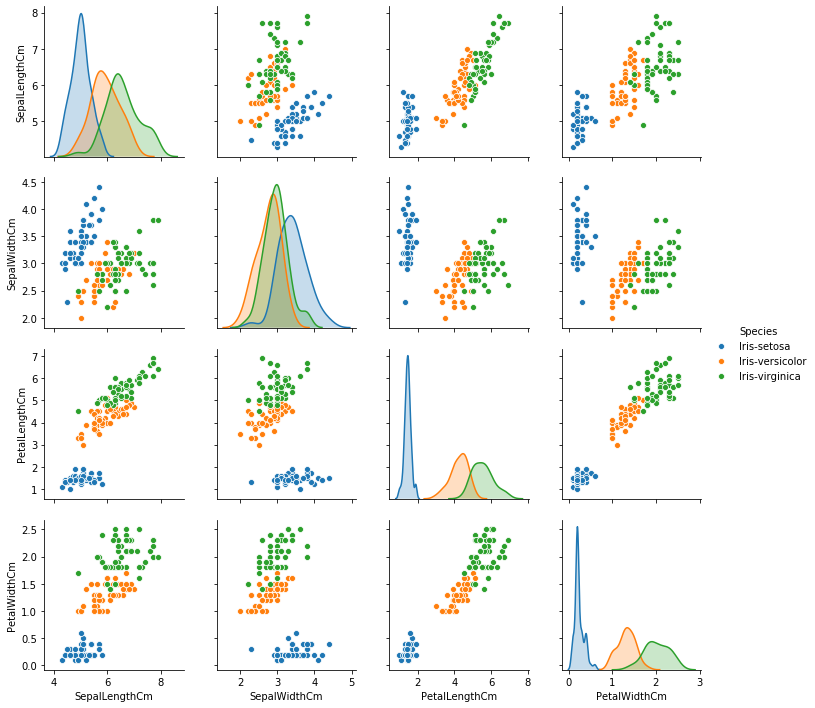

In [91]:
sns.pairplot(df, hue='Species')

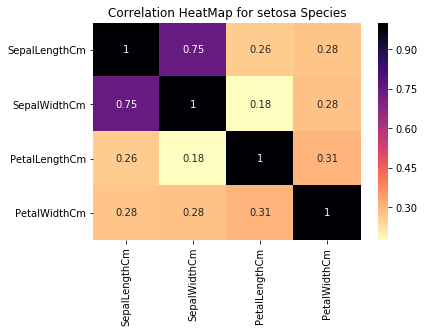

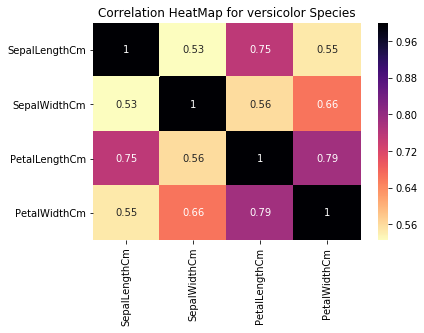

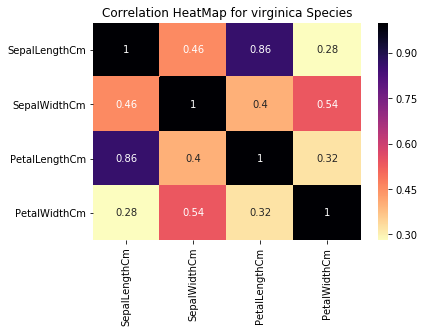

In [110]:
 # heat map
sns.heatmap(df[df['Species']=='Iris-setosa'].corr(), cmap='magma_r', annot=True)
plt.title('Correlation HeatMap for setosa Species')
plt.show()

sns.heatmap(df[df['Species']=='Iris-versicolor'].corr(), cmap='magma_r', annot=True)
plt.title('Correlation HeatMap for versicolor Species')
plt.show()

sns.heatmap(df[df['Species']=='Iris-virginica'].corr(), cmap='magma_r', annot=True)
plt.title('Correlation HeatMap for virginica Species')
plt.show()

# Creating model and determining the right number of clusters

In [93]:
dist_points_from_cluster_center = []
K = range(1,10)
for no_of_clusters in K:
    
    kmc = KMeans(n_clusters=no_of_clusters)
    kmc.fit(X)
    dist_points_from_cluster_center.append(kmc.inertia_)

# Determining the best K value using Elbow Method:

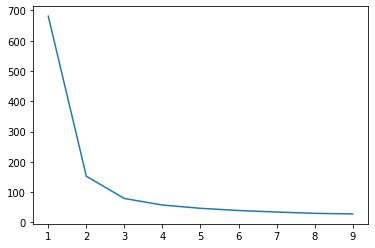

In [94]:
plt.plot(K, dist_points_from_cluster_center)

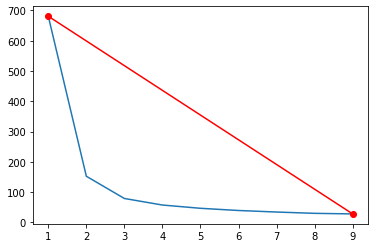

In [95]:
plt.plot(K, dist_points_from_cluster_center)
plt.plot([K[0], K[8]], [dist_points_from_cluster_center[0], 
                        dist_points_from_cluster_center[8]], 'ro-')
plt.show()

# Applying kmeans to the dataset / Creating the kmeans classifier

In [99]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmc = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_pred = kmc.fit_predict(X)

# Visualizing the predicted data

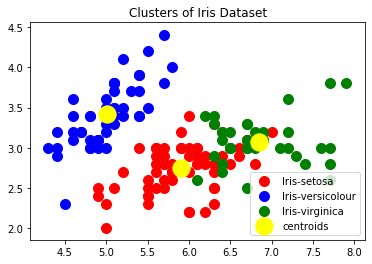

In [101]:
plt.scatter(X[y_pred == 0, 0],  X[y_pred == 0, 1], s= 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 0],  X[y_pred == 1, 1], s= 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 0],  X[y_pred == 2, 1], s= 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmc.cluster_centers_[:,0], kmc.cluster_centers_[:,1], s= 300, c = 'yellow', label = 'centroids')
plt.title('Clusters of Iris Dataset')
plt.legend()
plt.show()